<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_chd/blob/main/chd_Isabella's_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/Catherine-Nguyen88/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 86 (delta 45), reused 28 (delta 25), pack-reused 32
Receiving objects: 100% (86/86), 2.48 MiB | 6.16 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import training and testing datasets. see if we need to clean the data

In [ ]:
df_test = pd.read_csv('./project_chd/fhs_test.csv')
print( df_test.shape, '\n')
print( df_test.head(), '\n')

print(df_test.dtypes)
# count the nans in each variable
num_nans = df_test.isna().sum()
print("Number of NaNs for each variable:")
print(num_nans)

(1060, 17) 

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         674    0   58        1.0              1        20.0     0.0   
1        4070    0   51        3.0              0         0.0     0.0   
2        3150    0   44        2.0              1         9.0     0.0   
3        1695    0   40        2.0              1        20.0     0.0   
4        2692    1   58        2.0              1        20.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0      NaN  126.0   77.0  30.08   
1                0             0         0    264.0  135.0   83.0  26.68   
2                0             1         0      NaN  147.5   96.0  30.57   
3                0             0         0    271.0  138.5   88.0  27.24   
4                0             0         0    207.0  110.0   80.0  23.55   

   heartRate  glucose  TenYearCHD  
0       78.0      NaN           0  
1       60.0     74

In [ ]:
df_train = pd.read_csv('./project_chd/fhs_train.csv')
print(df_train.shape, '\n')
print(df_train.head(), '\n')
print(df_train.dtypes)

# count the nans in each variable
num_nans = df_train.isna().sum()
print("Number of NaNs for each variable:")
print(num_nans)

(3180, 17) 

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77

# Start here!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Clean & Transform Data

In [4]:
train_data = pd.read_csv('./project_chd/fhs_train.csv')
test_data = pd.read_csv('./project_chd/fhs_test.csv')

# clean training data
train_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

train_final = train_data1
#train_final = train_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
#                          'diabetes', 'totChol', 'sysBP',
#                          'diaBP', 'BMI', 'TenYearCHD']]
train_final1 = train_final.dropna()

# clean testing data
test_data1 = test_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
# test_final = test_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
#                                  'diabetes', 'totChol', 'sysBP',
#                                  'diaBP', 'BMI', 'TenYearCHD']]
test_final = test_data1
test_final1 = test_final.dropna()

# Trees

use tree to predict TenYearCHD

In [ ]:
train_final1.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
6,0,54,1.0,0,0.0,0.0,0,1,0,237.0,171.5,105.5,34.25,91,104.0,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor # import tree classifier
from sklearn.tree import plot_tree

# process data
y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

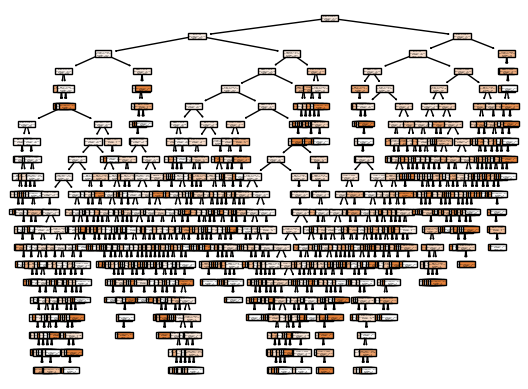

In [ ]:
# fit decision tree
cart = DecisionTreeRegressor(max_depth = 20) # create a regression object
cart = cart.fit(X,y) # fit the regression
var_names = cart.feature_names_in_

# visualize results
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

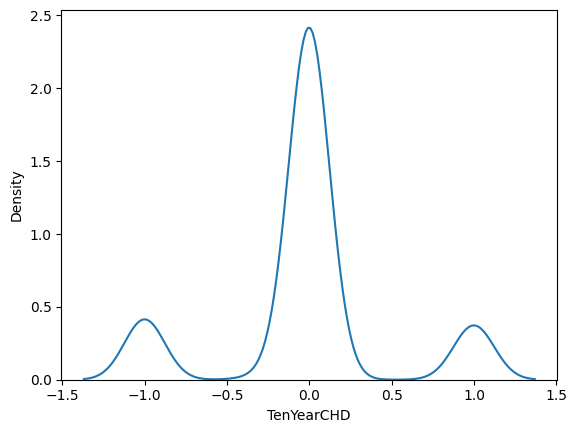

Rsq:  -0.9532256312664513 

RMSE:  0.49357961389059735 



In [ ]:
# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
sns.kdeplot(e)
plt.show()
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

### Test decision tree fit for depth of 5, 10, 20, 30
- save Rsq and rmse and plot



In [25]:
# process data
y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

depths = np.arange(1,50,5)
rsq = np.zeros(len(depths))
RMSE = np.zeros(len(depths))

for i in range(0,len(depths)):
  # fit decision tree with given depth
  cart = DecisionTreeRegressor(max_depth=depths[i],criterion='poisson',min_samples_split=20)
  cart = cart.fit(X,y) # fit the regression
  var_names = cart.feature_names_in_

  # make predictions on the test set
  y_hat = cart.predict(X_test)

  # residuals, rsq, rmse
  e = y_test - y_hat
  rsq[i] = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
  RMSE[i] = np.sqrt(np.mean(e**2))

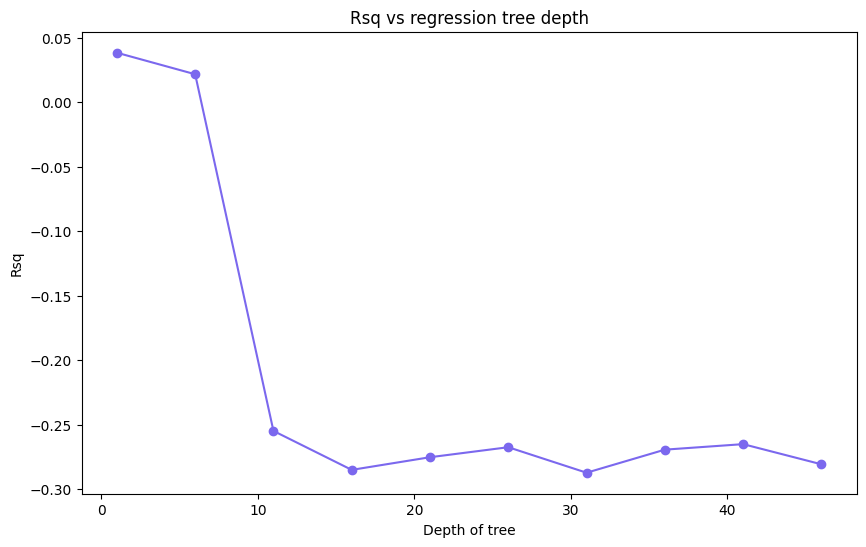

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(depths,rsq,marker='o',color='mediumslateblue')
plt.title("Rsq vs regression tree depth")
plt.xlabel("Depth of tree")
plt.ylabel("Rsq")
plt.show()

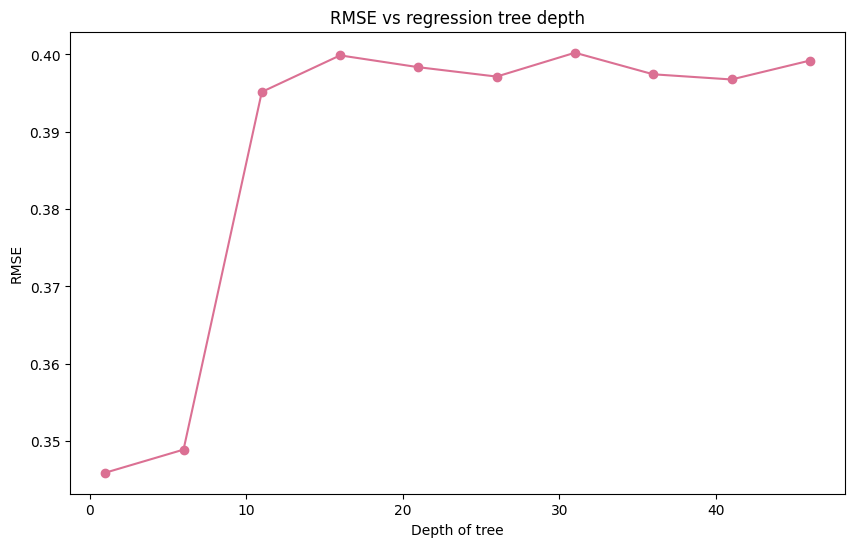

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(depths,RMSE,marker='o',color='palevioletred')
plt.title("RMSE vs regression tree depth")
plt.xlabel("Depth of tree")
plt.ylabel("RMSE")
plt.show()

### test for depth of 5

In [ ]:
cart = DecisionTreeRegressor(max_depth=5,criterion='poisson',min_samples_split=20,random_state=1)
cart = cart.fit(X,y) # fit the regression
var_names = cart.feature_names_in_

# make predictions on the test set
y_hat = cart.predict(X_test)

# maybe set y_hat below 0.5 to 0 and y_hat above 0.5 to 1
y_hat[y_hat < 0.5] = 0
y_hat[y_hat >= 0.5] = 1

# residuals, rsq, rmse
e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
RMSE = np.sqrt(np.mean(e**2))

print(rsq)
print(RMSE)

-0.1167709796355203
0.3727595361254074


# check correlation between variables

In [ ]:
train_data.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


<Axes: >

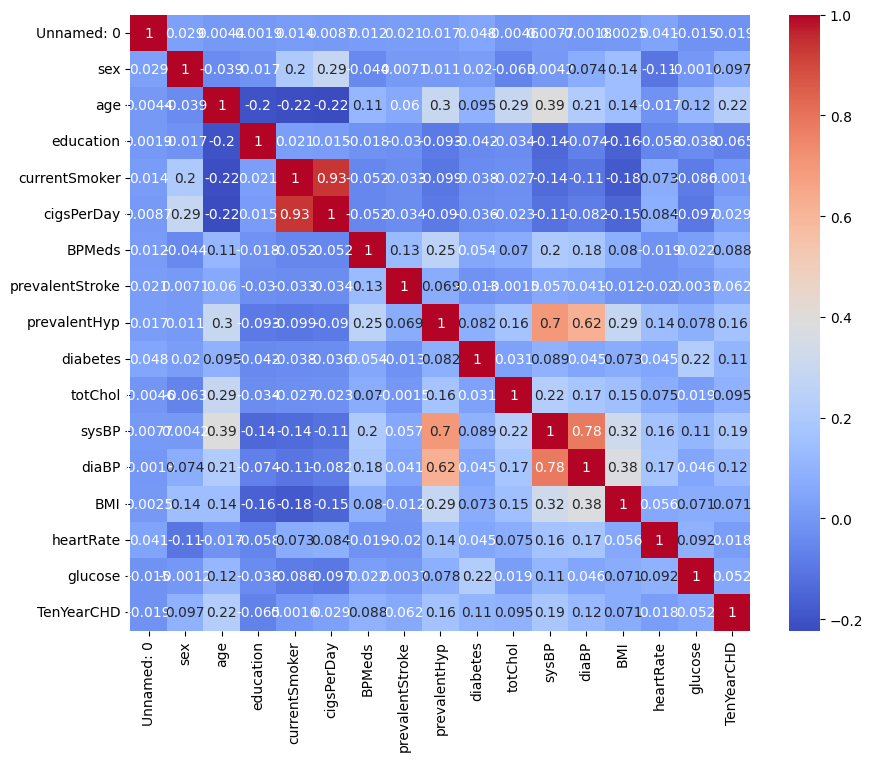

In [ ]:
corr_matrix = train_data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# New attempt with less variables

In [18]:
# process data
y = train_final1['TenYearCHD']
vars = ['age','sysBP','diaBP','prevalentHyp']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

depths = np.arange(1,50,5)
rsq = np.zeros(len(depths))
RMSE = np.zeros(len(depths))

for i in range(0,len(depths)):
  # fit decision tree with given depth
  cart = DecisionTreeRegressor(max_depth=depths[i],criterion='poisson',min_samples_split=20)
  cart = cart.fit(X,y) # fit the regression
  var_names = cart.feature_names_in_

  # make predictions on the test set
  y_hat = cart.predict(X_test)

  # residuals, rsq, rmse
  e = y_test - y_hat
  rsq[i] = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
  RMSE[i] = np.sqrt(np.mean(e**2))

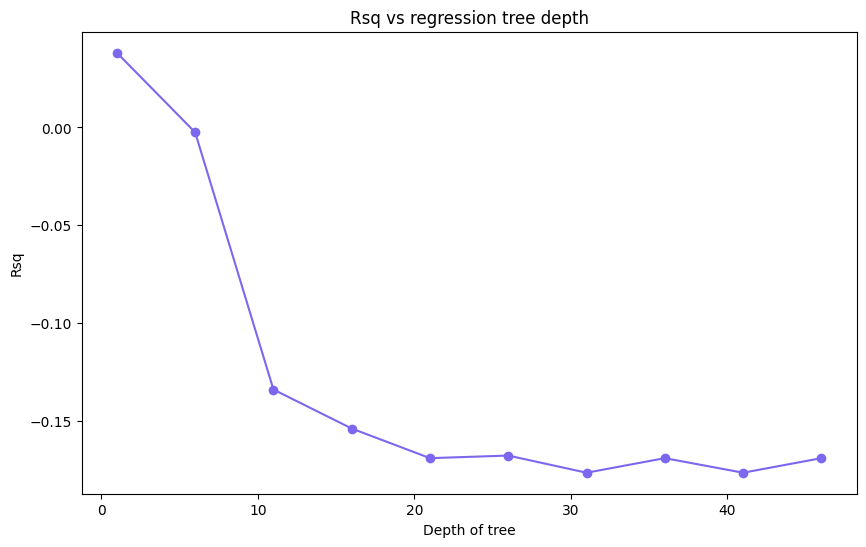

In [19]:
plt.figure(figsize=(10,6))
plt.plot(depths,rsq,marker='o',color='mediumslateblue')
plt.title("Rsq vs regression tree depth")
plt.xlabel("Depth of tree")
plt.ylabel("Rsq")
plt.show()

In [34]:
rsq

array([ 0.03823592,  0.03932819, -0.25574219, -0.28762565, -0.28588076,
       -0.27926897, -0.26229538, -0.27612541, -0.26153927, -0.27470715])

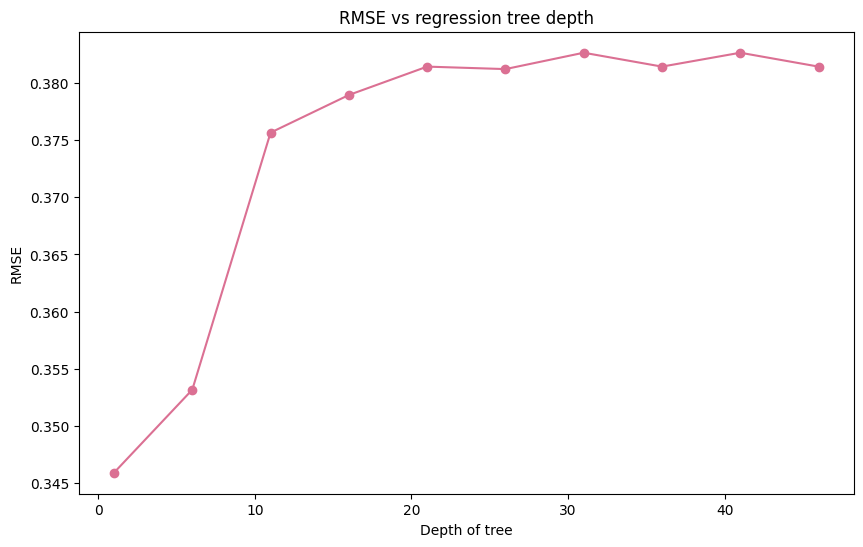

In [20]:
plt.figure(figsize=(10,6))
plt.plot(depths,RMSE,marker='o',color='palevioletred')
plt.title("RMSE vs regression tree depth")
plt.xlabel("Depth of tree")
plt.ylabel("RMSE")
plt.show()

Regardless of the depth of the tree, the Rsq value is very low and the RMSE is high, suggesting that this method is not effective for predicting TenYearCHD, at least based on the variables chosen.

# Combine trees and linear regression

In [37]:
from sklearn.tree import DecisionTreeClassifier

y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

# fit the decision tree classifier to hte data
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X, y)
tree_train_predictions = tree_classifier.predict(X) # predictions for the training data

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, tree_train_predictions) # fit linear regression using the predicted classes

# predict test data
lin_pred = linear_reg.predict(X_test)

rmse = np.sqrt( np.mean( (y_test - lin_pred)**2 ))
print('RMSE: ')
print(rmse)

print('R squared: ')
print(linear_reg.score(X_test, y_test))

RMSE: 
0.33569018107787874
R squared: 
0.09371040632617889
